In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('dataset (3).zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.activations import relu, sigmoid
from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [0]:
training_data = 'dataset/training'
validation_data = 'dataset/validation'
img_size = 80
batch_size = 64
epochs = 75

In [12]:
#AlexNet in Keras 
#input image is 80x80
model = Sequential()

model.add(Conv2D(96, (7, 7), input_shape=(3, img_size, img_size))) 
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (7, 7)))   
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3)))   
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 74, 74)        14208     
_________________________________________________________________
activation_1 (Activation)    (None, 96, 74, 74)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 74, 74)        296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 24, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 18, 18)       1204480   
_________________________________________________________________
activation_2 (Activation)    (None, 256, 18, 18)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 18, 18)       72        
__________

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.2, rotation_range=40, 
                                   shear_range=0.4, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(training_data, target_size=(img_size, img_size), class_mode='binary', batch_size=batch_size)
validation_batches = test_datagen.flow_from_directory(validation_data, target_size=(img_size, img_size), class_mode='binary', batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
from keras.callbacks import ModelCheckpoint
filepath = 'alexnet_best_weights.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

alexnet_model = model.fit_generator(
        train_batches,
        steps_per_epoch=20000 // batch_size,
        epochs=epochs,
        validation_data=validation_batches,
        validation_steps=5000 // batch_size,
        callbacks=callbacks_list)

Epoch 1/75
312/312 [==============================] - 123s 395ms/step - loss: 0.7285 - acc: 0.5635 - val_loss: 0.6437 - val_acc: 0.6226

Epoch 00001: val_loss improved from inf to 0.64369, saving model to alexnet_best_weights.hdf5
Epoch 2/75
220/312 [====================>.........] - ETA: 31s - loss: 0.6721 - acc: 0.6033

312/312 [==============================] - 122s 390ms/step - loss: 0.6657 - acc: 0.6092 - val_loss: 0.6249 - val_acc: 0.6615

Epoch 00002: val_loss improved from 0.64369 to 0.62494, saving model to alexnet_best_weights.hdf5
Epoch 3/75
292/312 [===========================>..] - ETA: 6s - loss: 0.6201 - acc: 0.6611

312/312 [==============================] - 122s 390ms/step - loss: 0.6190 - acc: 0.6630 - val_loss: 0.5791 - val_acc: 0.6889

Epoch 00003: val_loss improved from 0.62494 to 0.57911, saving model to alexnet_best_weights.hdf5
Epoch 4/75
310/312 [============================>.] - ETA: 0s - loss: 0.5926 - acc: 0.6861

312/312 [==============================] - 122s 391ms/step - loss: 0.5924 - acc: 0.6865 - val_loss: 0.5345 - val_acc: 0.7322

Epoch 00004: val_loss improved from 0.57911 to 0.53448, saving model to alexnet_best_weights.hdf5
Epoch 5/75
312/312 [==============================] - 121s 387ms/step - loss: 0.5650 - acc: 0.7165 - val_loss: 0.5424 - val_acc: 0.7330

Epoch 00005: val_loss did not improve from 0.53448
Epoch 6/75
  2/312 [..............................] - ETA: 35s - loss: 0.5608 - acc: 0.7031

312/312 [==============================] - 121s 388ms/step - loss: 0.5387 - acc: 0.7350 - val_loss: 0.4788 - val_acc: 0.7772

Epoch 00006: val_loss improved from 0.53448 to 0.47885, saving model to alexnet_best_weights.hdf5
Epoch 7/75
236/312 [=====================>........] - ETA: 25s - loss: 0.5191 - acc: 0.7526

312/312 [==============================] - 121s 388ms/step - loss: 0.5190 - acc: 0.7507 - val_loss: 0.4738 - val_acc: 0.7646

Epoch 00007: val_loss improved from 0.47885 to 0.47383, saving model to alexnet_best_weights.hdf5
Epoch 8/75
296/312 [===========================>..] - ETA: 5s - loss: 0.4918 - acc: 0.7677

312/312 [==============================] - 121s 387ms/step - loss: 0.4933 - acc: 0.7669 - val_loss: 0.4617 - val_acc: 0.7808

Epoch 00008: val_loss improved from 0.47383 to 0.46168, saving model to alexnet_best_weights.hdf5
Epoch 9/75
311/312 [============================>.] - ETA: 0s - loss: 0.4916 - acc: 0.7709

312/312 [==============================] - 120s 385ms/step - loss: 0.4917 - acc: 0.7708 - val_loss: 0.4646 - val_acc: 0.7696

Epoch 00009: val_loss did not improve from 0.46168
Epoch 10/75
312/312 [==============================] - 120s 385ms/step - loss: 0.4759 - acc: 0.7757 - val_loss: 0.3998 - val_acc: 0.8155

Epoch 00010: val_loss improved from 0.46168 to 0.39980, saving model to alexnet_best_weights.hdf5
Epoch 11/75
 30/312 [=>............................] - ETA: 1:13 - loss: 0.4467 - acc: 0.7948

312/312 [==============================] - 120s 386ms/step - loss: 0.4542 - acc: 0.7898 - val_loss: 0.4546 - val_acc: 0.7887

Epoch 00011: val_loss did not improve from 0.39980
Epoch 12/75
286/312 [==========================>...] - ETA: 8s - loss: 0.4501 - acc: 0.7907

312/312 [==============================] - 121s 388ms/step - loss: 0.4513 - acc: 0.7901 - val_loss: 0.3856 - val_acc: 0.8199

Epoch 00012: val_loss improved from 0.39980 to 0.38557, saving model to alexnet_best_weights.hdf5
Epoch 13/75
308/312 [============================>.] - ETA: 1s - loss: 0.4429 - acc: 0.8000

312/312 [==============================] - 121s 387ms/step - loss: 0.4431 - acc: 0.8000 - val_loss: 0.3752 - val_acc: 0.8325

Epoch 00013: val_loss improved from 0.38557 to 0.37522, saving model to alexnet_best_weights.hdf5
Epoch 14/75
312/312 [==============================] - 121s 387ms/step - loss: 0.4316 - acc: 0.8015 - val_loss: 0.3943 - val_acc: 0.8209



Epoch 00014: val_loss did not improve from 0.37522
Epoch 15/75
312/312 [==============================] - 120s 386ms/step - loss: 0.4197 - acc: 0.8081 - val_loss: 0.3788 - val_acc: 0.8299

Epoch 00015: val_loss did not improve from 0.37522
Epoch 16/75
164/312 [==============>...............] - ETA: 47s - loss: 0.4171 - acc: 0.8081

312/312 [==============================] - 121s 387ms/step - loss: 0.4173 - acc: 0.8097 - val_loss: 0.3668 - val_acc: 0.8389

Epoch 00016: val_loss improved from 0.37522 to 0.36683, saving model to alexnet_best_weights.hdf5
Epoch 17/75
277/312 [=========================>....] - ETA: 11s - loss: 0.4022 - acc: 0.8198

312/312 [==============================] - 121s 386ms/step - loss: 0.4025 - acc: 0.8197 - val_loss: 0.3557 - val_acc: 0.8502

Epoch 00017: val_loss improved from 0.36683 to 0.35571, saving model to alexnet_best_weights.hdf5
Epoch 18/75
306/312 [============================>.] - ETA: 1s - loss: 0.3937 - acc: 0.8208

312/312 [==============================] - 120s 385ms/step - loss: 0.3941 - acc: 0.8206 - val_loss: 0.3364 - val_acc: 0.8427

Epoch 00018: val_loss improved from 0.35571 to 0.33644, saving model to alexnet_best_weights.hdf5
Epoch 19/75
312/312 [==============================] - 120s 385ms/step - loss: 0.3933 - acc: 0.8238 - val_loss: 0.3285 - val_acc: 0.8566



Epoch 00019: val_loss improved from 0.33644 to 0.32853, saving model to alexnet_best_weights.hdf5
Epoch 20/75
312/312 [==============================] - 120s 385ms/step - loss: 0.3850 - acc: 0.8291 - val_loss: 0.3829 - val_acc: 0.8295

Epoch 00020: val_loss did not improve from 0.32853
Epoch 21/75
105/312 [=========>....................] - ETA: 1:04 - loss: 0.3752 - acc: 0.8345

312/312 [==============================] - 120s 384ms/step - loss: 0.3838 - acc: 0.8262 - val_loss: 0.3262 - val_acc: 0.8584

Epoch 00021: val_loss improved from 0.32853 to 0.32624, saving model to alexnet_best_weights.hdf5
Epoch 22/75
262/312 [========================>.....] - ETA: 16s - loss: 0.3782 - acc: 0.8328

312/312 [==============================] - 120s 386ms/step - loss: 0.3770 - acc: 0.8322 - val_loss: 0.3795 - val_acc: 0.8267

Epoch 00022: val_loss did not improve from 0.32624
Epoch 23/75
312/312 [==============================] - 120s 384ms/step - loss: 0.3789 - acc: 0.8280 - val_loss: 0.3653 - val_acc: 0.8289

Epoch 00023: val_loss did not improve from 0.32624
Epoch 24/75
 25/312 [=>............................] - ETA: 1:02 - loss: 0.3699 - acc: 0.8256

312/312 [==============================] - 120s 386ms/step - loss: 0.3677 - acc: 0.8359 - val_loss: 0.3535 - val_acc: 0.8407

Epoch 00024: val_loss did not improve from 0.32624
Epoch 25/75
285/312 [==========================>...] - ETA: 8s - loss: 0.3622 - acc: 0.8372

312/312 [==============================] - 120s 385ms/step - loss: 0.3632 - acc: 0.8364 - val_loss: 0.3109 - val_acc: 0.8592

Epoch 00025: val_loss improved from 0.32624 to 0.31087, saving model to alexnet_best_weights.hdf5
Epoch 26/75
308/312 [============================>.] - ETA: 1s - loss: 0.3656 - acc: 0.8391

312/312 [==============================] - 121s 387ms/step - loss: 0.3659 - acc: 0.8393 - val_loss: 0.3383 - val_acc: 0.8470

Epoch 00026: val_loss did not improve from 0.31087
Epoch 27/75
312/312 [==============================] - 120s 385ms/step - loss: 0.3561 - acc: 0.8429 - val_loss: 0.2979 - val_acc: 0.8682

Epoch 00027: val_loss improved from 0.31087 to 0.29787, saving model to alexnet_best_weights.hdf5
Epoch 28/75
 29/312 [=>............................] - ETA: 1:05 - loss: 0.3600 - acc: 0.8324

312/312 [==============================] - 120s 385ms/step - loss: 0.3507 - acc: 0.8430 - val_loss: 0.3152 - val_acc: 0.8584

Epoch 00028: val_loss did not improve from 0.29787
Epoch 29/75
286/312 [==========================>...] - ETA: 8s - loss: 0.3547 - acc: 0.8432

312/312 [==============================] - 120s 386ms/step - loss: 0.3520 - acc: 0.8449 - val_loss: 0.3025 - val_acc: 0.8660

Epoch 00029: val_loss did not improve from 0.29787
Epoch 30/75
312/312 [==============================] - 120s 384ms/step - loss: 0.3492 - acc: 0.8443 - val_loss: 0.3277 - val_acc: 0.8600

Epoch 00030: val_loss did not improve from 0.29787
Epoch 31/75
 30/312 [=>............................] - ETA: 1:05 - loss: 0.3475 - acc: 0.8406

312/312 [==============================] - 120s 386ms/step - loss: 0.3453 - acc: 0.8471 - val_loss: 0.3061 - val_acc: 0.8638

Epoch 00031: val_loss did not improve from 0.29787
Epoch 32/75
286/312 [==========================>...] - ETA: 8s - loss: 0.3430 - acc: 0.8488

312/312 [==============================] - 120s 383ms/step - loss: 0.3428 - acc: 0.8482 - val_loss: 0.3161 - val_acc: 0.8618

Epoch 00032: val_loss did not improve from 0.29787
Epoch 33/75
312/312 [==============================] - 120s 385ms/step - loss: 0.3365 - acc: 0.8529 - val_loss: 0.2971 - val_acc: 0.8682

Epoch 00033: val_loss improved from 0.29787 to 0.29715, saving model to alexnet_best_weights.hdf5
Epoch 34/75
 26/312 [=>............................] - ETA: 1:02 - loss: 0.3228 - acc: 0.8636

312/312 [==============================] - 120s 385ms/step - loss: 0.3352 - acc: 0.8512 - val_loss: 0.2986 - val_acc: 0.8722

Epoch 00034: val_loss did not improve from 0.29715
Epoch 35/75
285/312 [==========================>...] - ETA: 8s - loss: 0.3350 - acc: 0.8520

312/312 [==============================] - 121s 387ms/step - loss: 0.3345 - acc: 0.8522 - val_loss: 0.3264 - val_acc: 0.8578

Epoch 00035: val_loss did not improve from 0.29715
Epoch 36/75
312/312 [==============================] - 120s 385ms/step - loss: 0.3346 - acc: 0.8541 - val_loss: 0.3046 - val_acc: 0.8716

Epoch 00036: val_loss did not improve from 0.29715
Epoch 37/75
 29/312 [=>............................] - ETA: 1:06 - loss: 0.3277 - acc: 0.8572

312/312 [==============================] - 120s 385ms/step - loss: 0.3352 - acc: 0.8517 - val_loss: 0.2929 - val_acc: 0.8720

Epoch 00037: val_loss improved from 0.29715 to 0.29290, saving model to alexnet_best_weights.hdf5
Epoch 38/75
243/312 [======================>.......] - ETA: 22s - loss: 0.3166 - acc: 0.8625

312/312 [==============================] - 119s 383ms/step - loss: 0.3205 - acc: 0.8596 - val_loss: 0.2870 - val_acc: 0.8772

Epoch 00038: val_loss improved from 0.29290 to 0.28699, saving model to alexnet_best_weights.hdf5
Epoch 39/75
296/312 [===========================>..] - ETA: 5s - loss: 0.3203 - acc: 0.8584

312/312 [==============================] - 119s 382ms/step - loss: 0.3217 - acc: 0.8577 - val_loss: 0.2953 - val_acc: 0.8720

Epoch 00039: val_loss did not improve from 0.28699
Epoch 40/75
312/312 [==============================] - 121s 386ms/step - loss: 0.3247 - acc: 0.8579 - val_loss: 0.2911 - val_acc: 0.8686

Epoch 00040: val_loss did not improve from 0.28699
Epoch 41/75
 31/312 [=>............................] - ETA: 1:07 - loss: 0.3315 - acc: 0.8508

312/312 [==============================] - 120s 384ms/step - loss: 0.3182 - acc: 0.8598 - val_loss: 0.2983 - val_acc: 0.8730

Epoch 00041: val_loss did not improve from 0.28699
Epoch 42/75
287/312 [==========================>...] - ETA: 8s - loss: 0.3091 - acc: 0.8649

312/312 [==============================] - 119s 383ms/step - loss: 0.3097 - acc: 0.8646 - val_loss: 0.2994 - val_acc: 0.8702

Epoch 00042: val_loss did not improve from 0.28699
Epoch 43/75
312/312 [==============================] - 120s 384ms/step - loss: 0.3108 - acc: 0.8673 - val_loss: 0.3008 - val_acc: 0.8706

Epoch 00043: val_loss did not improve from 0.28699
Epoch 44/75
 30/312 [=>............................] - ETA: 1:06 - loss: 0.3276 - acc: 0.8516

312/312 [==============================] - 119s 382ms/step - loss: 0.3145 - acc: 0.8625 - val_loss: 0.3033 - val_acc: 0.8654

Epoch 00044: val_loss did not improve from 0.28699
Epoch 45/75
286/312 [==========================>...] - ETA: 8s - loss: 0.3082 - acc: 0.8649

312/312 [==============================] - 120s 383ms/step - loss: 0.3097 - acc: 0.8646 - val_loss: 0.2881 - val_acc: 0.8772

Epoch 00045: val_loss did not improve from 0.28699
Epoch 46/75
312/312 [==============================] - 120s 383ms/step - loss: 0.3066 - acc: 0.8645 - val_loss: 0.2801 - val_acc: 0.8824

Epoch 00046: val_loss improved from 0.28699 to 0.28015, saving model to alexnet_best_weights.hdf5
Epoch 47/75
 26/312 [=>............................] - ETA: 1:01 - loss: 0.3368 - acc: 0.8528

312/312 [==============================] - 120s 384ms/step - loss: 0.3108 - acc: 0.8669 - val_loss: 0.2719 - val_acc: 0.8880

Epoch 00047: val_loss improved from 0.28015 to 0.27188, saving model to alexnet_best_weights.hdf5
Epoch 48/75
242/312 [======================>.......] - ETA: 22s - loss: 0.3028 - acc: 0.8687

312/312 [==============================] - 119s 382ms/step - loss: 0.3050 - acc: 0.8667 - val_loss: 0.2970 - val_acc: 0.8732

Epoch 00048: val_loss did not improve from 0.27188
Epoch 49/75
312/312 [==============================] - 120s 383ms/step - loss: 0.3031 - acc: 0.8691 - val_loss: 0.2969 - val_acc: 0.8714

Epoch 00049: val_loss did not improve from 0.27188
Epoch 50/75
 22/312 [=>............................] - ETA: 57s - loss: 0.2895 - acc: 0.8814

312/312 [==============================] - 120s 384ms/step - loss: 0.3037 - acc: 0.8683 - val_loss: 0.2672 - val_acc: 0.8828

Epoch 00050: val_loss improved from 0.27188 to 0.26719, saving model to alexnet_best_weights.hdf5
Epoch 51/75
241/312 [======================>.......] - ETA: 23s - loss: 0.2934 - acc: 0.8721

312/312 [==============================] - 120s 384ms/step - loss: 0.2947 - acc: 0.8723 - val_loss: 0.2596 - val_acc: 0.8910

Epoch 00051: val_loss improved from 0.26719 to 0.25961, saving model to alexnet_best_weights.hdf5
Epoch 52/75
297/312 [===========================>..] - ETA: 4s - loss: 0.3015 - acc: 0.8654

312/312 [==============================] - 120s 386ms/step - loss: 0.3019 - acc: 0.8655 - val_loss: 0.3069 - val_acc: 0.8608

Epoch 00052: val_loss did not improve from 0.25961
Epoch 53/75
312/312 [==============================] - 120s 384ms/step - loss: 0.2955 - acc: 0.8731 - val_loss: 0.2691 - val_acc: 0.8860

Epoch 00053: val_loss did not improve from 0.25961
Epoch 54/75
 31/312 [=>............................] - ETA: 1:06 - loss: 0.2912 - acc: 0.8684

312/312 [==============================] - 120s 385ms/step - loss: 0.2973 - acc: 0.8719 - val_loss: 0.2602 - val_acc: 0.8918

Epoch 00054: val_loss did not improve from 0.25961
Epoch 55/75
287/312 [==========================>...] - ETA: 8s - loss: 0.2949 - acc: 0.8741

312/312 [==============================] - 120s 384ms/step - loss: 0.2941 - acc: 0.8742 - val_loss: 0.2551 - val_acc: 0.8944

Epoch 00055: val_loss improved from 0.25961 to 0.25511, saving model to alexnet_best_weights.hdf5
Epoch 56/75
308/312 [============================>.] - ETA: 1s - loss: 0.2889 - acc: 0.8740

312/312 [==============================] - 120s 384ms/step - loss: 0.2892 - acc: 0.8738 - val_loss: 0.2899 - val_acc: 0.8808

Epoch 00056: val_loss did not improve from 0.25511
Epoch 57/75
312/312 [==============================] - 120s 384ms/step - loss: 0.2879 - acc: 0.8743 - val_loss: 0.2742 - val_acc: 0.8844

Epoch 00057: val_loss did not improve from 0.25511
Epoch 58/75
 33/312 [==>...........................] - ETA: 1:07 - loss: 0.2726 - acc: 0.8769

312/312 [==============================] - 120s 385ms/step - loss: 0.2841 - acc: 0.8766 - val_loss: 0.2792 - val_acc: 0.8774

Epoch 00058: val_loss did not improve from 0.25511
Epoch 59/75
287/312 [==========================>...] - ETA: 8s - loss: 0.2861 - acc: 0.8759

312/312 [==============================] - 120s 384ms/step - loss: 0.2854 - acc: 0.8764 - val_loss: 0.2868 - val_acc: 0.8858

Epoch 00059: val_loss did not improve from 0.25511
Epoch 60/75
312/312 [==============================] - 120s 385ms/step - loss: 0.2807 - acc: 0.8799 - val_loss: 0.2565 - val_acc: 0.8940

Epoch 00060: val_loss did not improve from 0.25511
Epoch 61/75
 30/312 [=>............................] - ETA: 1:05 - loss: 0.2952 - acc: 0.8719

312/312 [==============================] - 120s 386ms/step - loss: 0.2785 - acc: 0.8796 - val_loss: 0.2733 - val_acc: 0.8842

Epoch 00061: val_loss did not improve from 0.25511
Epoch 62/75
286/312 [==========================>...] - ETA: 8s - loss: 0.2836 - acc: 0.8763

312/312 [==============================] - 119s 381ms/step - loss: 0.2836 - acc: 0.8757 - val_loss: 0.3051 - val_acc: 0.8692

Epoch 00062: val_loss did not improve from 0.25511
Epoch 63/75
312/312 [==============================] - 120s 384ms/step - loss: 0.2760 - acc: 0.8797 - val_loss: 0.2921 - val_acc: 0.8734

Epoch 00063: val_loss did not improve from 0.25511
Epoch 64/75
 30/312 [=>............................] - ETA: 1:06 - loss: 0.2786 - acc: 0.8797

312/312 [==============================] - 120s 385ms/step - loss: 0.2765 - acc: 0.8789 - val_loss: 0.3261 - val_acc: 0.8568

Epoch 00064: val_loss did not improve from 0.25511
Epoch 65/75
287/312 [==========================>...] - ETA: 8s - loss: 0.2819 - acc: 0.8794

312/312 [==============================] - 120s 384ms/step - loss: 0.2808 - acc: 0.8799 - val_loss: 0.2739 - val_acc: 0.8844

Epoch 00065: val_loss did not improve from 0.25511
Epoch 66/75
312/312 [==============================] - 120s 385ms/step - loss: 0.2723 - acc: 0.8835 - val_loss: 0.2560 - val_acc: 0.8870

Epoch 00066: val_loss did not improve from 0.25511
Epoch 67/75
 30/312 [=>............................] - ETA: 1:05 - loss: 0.2793 - acc: 0.8786

312/312 [==============================] - 121s 387ms/step - loss: 0.2714 - acc: 0.8844 - val_loss: 0.2669 - val_acc: 0.8916

Epoch 00067: val_loss did not improve from 0.25511
Epoch 68/75
286/312 [==========================>...] - ETA: 8s - loss: 0.2718 - acc: 0.8814

312/312 [==============================] - 120s 385ms/step - loss: 0.2714 - acc: 0.8818 - val_loss: 0.2617 - val_acc: 0.8880

Epoch 00068: val_loss did not improve from 0.25511
Epoch 69/75
312/312 [==============================] - 120s 386ms/step - loss: 0.2667 - acc: 0.8856 - val_loss: 0.2951 - val_acc: 0.8736

Epoch 00069: val_loss did not improve from 0.25511
Epoch 70/75
 30/312 [=>............................] - ETA: 1:06 - loss: 0.2822 - acc: 0.8781

312/312 [==============================] - 120s 385ms/step - loss: 0.2716 - acc: 0.8847 - val_loss: 0.2538 - val_acc: 0.8902

Epoch 00070: val_loss improved from 0.25511 to 0.25381, saving model to alexnet_best_weights.hdf5
Epoch 71/75
243/312 [======================>.......] - ETA: 22s - loss: 0.2648 - acc: 0.8871

312/312 [==============================] - 117s 376ms/step - loss: 0.2657 - acc: 0.8869 - val_loss: 0.2613 - val_acc: 0.8890

Epoch 00071: val_loss did not improve from 0.25381
Epoch 72/75
312/312 [==============================] - 114s 367ms/step - loss: 0.2637 - acc: 0.8862 - val_loss: 0.2594 - val_acc: 0.8872

Epoch 00072: val_loss did not improve from 0.25381
Epoch 73/75
 22/312 [=>............................] - ETA: 54s - loss: 0.2629 - acc: 0.8842

312/312 [==============================] - 116s 371ms/step - loss: 0.2654 - acc: 0.8853 - val_loss: 0.2555 - val_acc: 0.8948

Epoch 00073: val_loss did not improve from 0.25381
Epoch 74/75
284/312 [==========================>...] - ETA: 8s - loss: 0.2593 - acc: 0.8902

312/312 [==============================] - 115s 369ms/step - loss: 0.2589 - acc: 0.8900 - val_loss: 0.2726 - val_acc: 0.8850

Epoch 00074: val_loss did not improve from 0.25381
Epoch 75/75
312/312 [==============================] - 116s 371ms/step - loss: 0.2654 - acc: 0.8867 - val_loss: 0.2562 - val_acc: 0.8944

Epoch 00075: val_loss did not improve from 0.25381


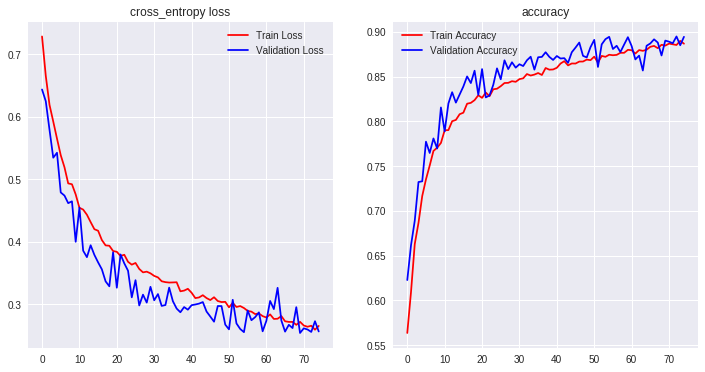

In [12]:
#plot function used from the keras mnist hw
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss_accuracy(alexnet_model):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(alexnet_model.history["loss"],'r-x', label="Train Loss")
    ax.plot(alexnet_model.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(alexnet_model.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(alexnet_model.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(alexnet_model)

In [6]:
#Upload test set (files are from google drive)
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving test1.zip to test1.zip
User uploaded file "test1.zip" with length 284479986 bytes


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('test1.zip', 'r')
zip_ref.extractall()
zip_ref.close()

dog


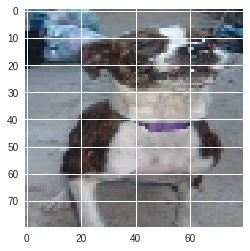

dog


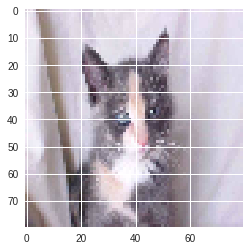

dog


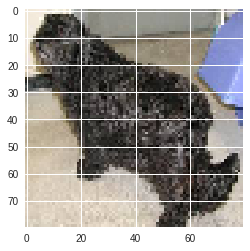

dog


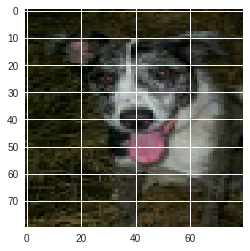

dog


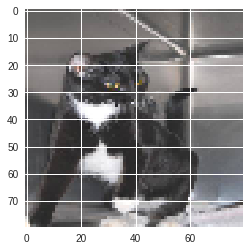

dog


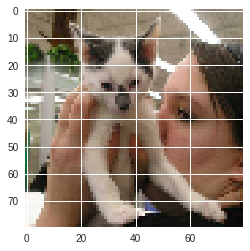

dog


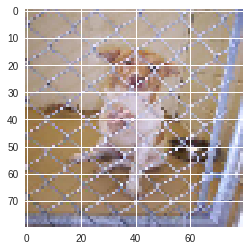

dog


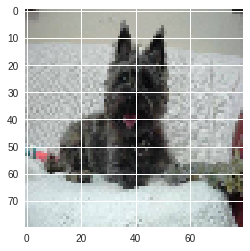

dog


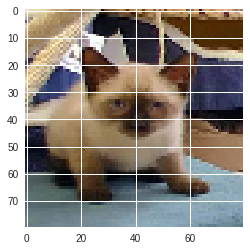

dog


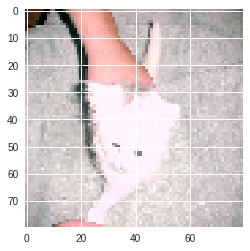

dog


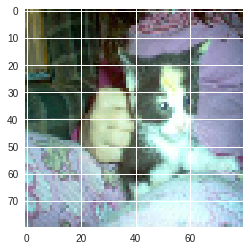

dog


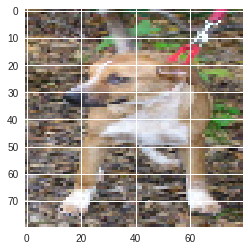

dog


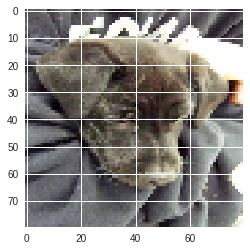

dog


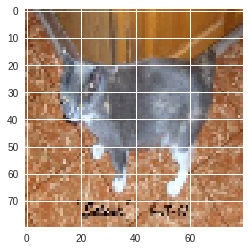

dog


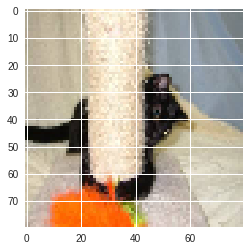

dog


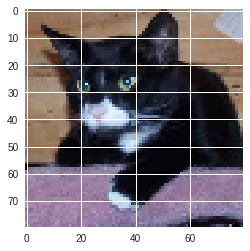

dog


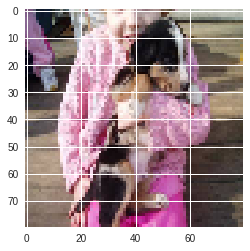

dog


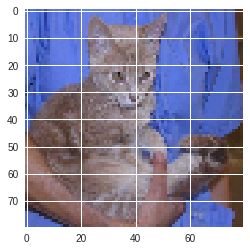

dog


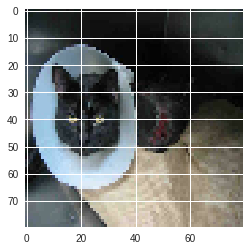

dog


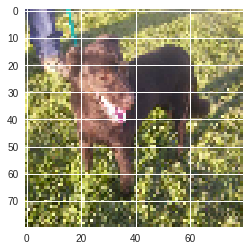

In [13]:
# Prediction using the test data
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

list_of_imgs = []
img_dir = "test1"
i=0
for img in os.listdir(img_dir):
    #load img
    img_name = os.path.join(img_dir, img)
    if not img.endswith(".jpg"):
        continue
    img = image.load_img(img_name, target_size=(80, 80))
    test_image = image.img_to_array(img)
    
    #prediction
    x = model.predict(np.array([test_image]))
    if(x[0][0] < 0.5):
      print("cat")
    else:
      print("dog")
    plt.imshow(img)
    plt.show(img)